In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ ------------


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Library Khusus Imbalanced Data & Boosting
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Setting tampilan visualisasi
sns.set(style='whitegrid')
print("✅ Semua library berhasil di-import!")

✅ Semua library berhasil di-import!


In [9]:
# 2. Load Dataset
# Sumber data: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

import os

# Cek lokasi file biar pasti
path_file = 'fraud-detection-project/data/creditcard.csv'

try:
    # Membaca file dari dalam folder 'fraud'
    df = pd.read_csv(path_file)
    print(f"✅ Data berhasil diload dari '{path_file}'! Ukuran: {df.shape}")
except FileNotFoundError:
    # Jaga-jaga kalau notebook kamu ternyata SUDAH ada di dalam folder 'fraud'
    try:
        df = pd.read_csv('creditcard.csv')
        print(f"✅ Data berhasil diload dari 'creditcard.csv'! Ukuran: {df.shape}")
    except FileNotFoundError:
        print("❌ Gawat! File 'creditcard.csv' tidak ditemukan di folder 'fraud' maupun di folder saat ini.")
        print("Cek lagi posisi file kamu ya.")

# Cek 5 baris teratas
df.head()

✅ Data berhasil diload dari 'creditcard.csv'! Ukuran: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Jumlah Transaksi:
Class
0    284315
1       492
Name: count, dtype: int64

Persentase Fraud: 0.17%


D:\TEMP\ipykernel_23772\1861160346.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['blue', 'red'])


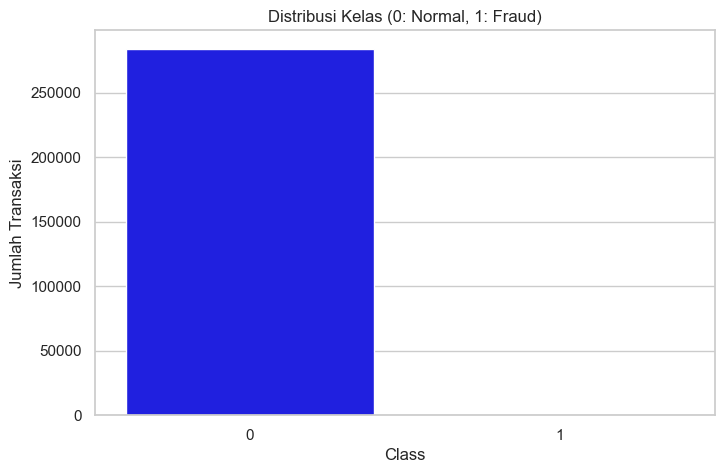

In [10]:
# 3. Cek Distribusi Kelas (Normal vs Fraud)
counts = df['Class'].value_counts()
print("Jumlah Transaksi:")
print(counts)
print(f"\nPersentase Fraud: {(counts[1] / len(df)) * 100:.2f}%")

# Visualisasi Ketimpangan
plt.figure(figsize=(8,5))
sns.countplot(x='Class', data=df, palette=['blue', 'red'])
plt.title('Distribusi Kelas (0: Normal, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Jumlah Transaksi')
plt.show()

# Insight:
# Terlihat jelas batang 'Fraud' (1) sangat kecil dibandingkan 'Normal' (0).
# Jika langsung dimodelkan tanpa handling, AI akan bias ke 'Normal'.

In [11]:
# 4. Scaling (Penyamaan Skala)
# Kolom 'Amount' dan 'Time' punya rentang angka yang beda jauh dari kolom V1-V28.
# Kita pakai RobustScaler karena lebih tahan terhadap outlier.

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Hapus kolom asli yang belum di-scale
df.drop(['Time','Amount'], axis=1, inplace=True)

# Pindahkan kolom Class ke depan (opsional, biar rapi aja)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

print("✅ Scaling selesai. Cek data baru:")
df.head()

✅ Scaling selesai. Cek data baru:


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [12]:
# 5. Split Data & SMOTE

# Pisahkan Fitur (X) dan Target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# SPLIT DULUAN sebelum SMOTE (Wajib! Agar data test tetap murni/asli)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek jumlah sebelum SMOTE
print("Sebelum SMOTE (Train set):")
print(y_train.value_counts())

# Terapkan SMOTE hanya pada Data Training
print("\nSedang melakukan SMOTE... (Tunggu sebentar)")
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Cek jumlah sesudah SMOTE
print("\nSesudah SMOTE (Train set):")
print(y_train_res.value_counts())

# Insight: Sekarang jumlah Fraud (1) dan Normal (0) di training set sudah sama banyak!

Sebelum SMOTE (Train set):
Class
0    227451
1       394
Name: count, dtype: int64

Sedang melakukan SMOTE... (Tunggu sebentar)

Sesudah SMOTE (Train set):
Class
0    227451
1    227451
Name: count, dtype: int64


In [13]:
# 6. Modeling (XGBoost Classifier)

# Inisialisasi Model
model_xgb = xgb.XGBClassifier(
    n_estimators=100,     # Jumlah 'pohon' keputusan
    learning_rate=0.1,    # Kecepatan belajar
    max_depth=5,          # Kedalaman pohon
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Latih model dengan data hasil SMOTE
print("Sedang melatih model XGBoost...")
model_xgb.fit(X_train_res, y_train_res)
print("✅ Model selesai dilatih!")

Sedang melatih model XGBoost...


d:\Portofolio\fraud-detection-project\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [01:22:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model selesai dilatih!


--- CLASSIFICATION REPORT ---

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.28      0.89      0.42        98

    accuracy                           1.00     56962
   macro avg       0.64      0.94      0.71     56962
weighted avg       1.00      1.00      1.00     56962



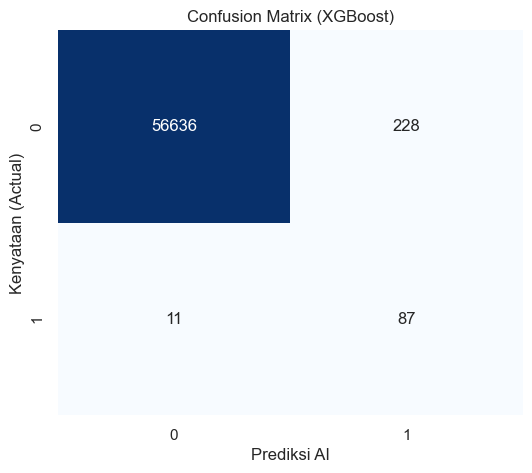

In [14]:
# 7. Evaluasi

# Prediksi ke data Test (Data Asli)
y_pred = model_xgb.predict(X_test)

# Tampilkan Laporan Klasifikasi
print("--- CLASSIFICATION REPORT ---\n")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (XGBoost)')
plt.ylabel('Kenyataan (Actual)')
plt.xlabel('Prediksi AI')
plt.show()

In [15]:
# --- 8. Business Impact Analysis (Analisis Cuan) ---
# Asumsi: Rata-rata kerugian per fraud = Rp 5 Juta
avg_fraud_loss = 5000000
cost_to_check = 50000

tn, fp, fn, tp = cm.ravel()

# Tanpa AI (Semua fraud lolos)
loss_without_ai = (fn + tp) * avg_fraud_loss

# Dengan AI (Hanya fraud yang lolos + biaya cek)
loss_with_ai = (fn * avg_fraud_loss) + ((tp + fp) * cost_to_check)

# Penghematan
savings = loss_without_ai - loss_with_ai

print(f"--- DAMPAK BISNIS ---")
print(f"Potensi Kerugian Tanpa AI : Rp {loss_without_ai:,.0f}")
print(f"Kerugian Setelah Pakai AI : Rp {loss_with_ai:,.0f}")
print(f"💰 UANG YANG DISELAMATKAN   : Rp {savings:,.0f}")

--- DAMPAK BISNIS ---
Potensi Kerugian Tanpa AI : Rp 490,000,000
Kerugian Setelah Pakai AI : Rp 70,750,000
💰 UANG YANG DISELAMATKAN   : Rp 419,250,000


In [16]:
import joblib

# Simpan model ke file
joblib.dump(model_xgb, 'model_fraud_xgboost.pkl')
print("✅ Model berhasil disimpan sebagai 'model_fraud_xgboost.pkl'")

✅ Model berhasil disimpan sebagai 'model_fraud_xgboost.pkl'
